<a href="https://colab.research.google.com/github/SohamDeep2026/Tinkering-with-a-TVAR-Model/blob/main/Testing_TVAR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

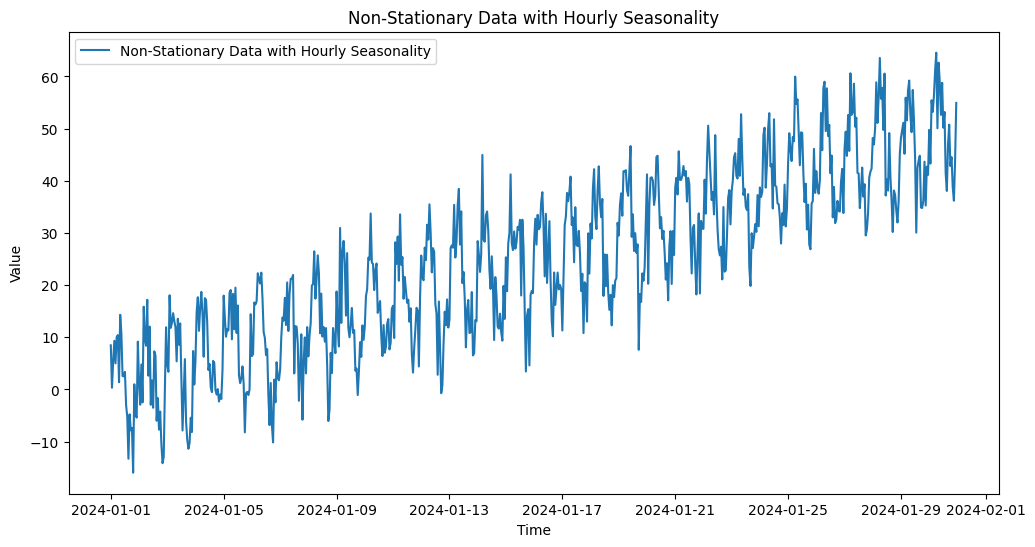

The time series is not ADF Stationary
The time series is not KPSS Stationary


<ipython-input-5-d1be8456e970>:62: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(y)


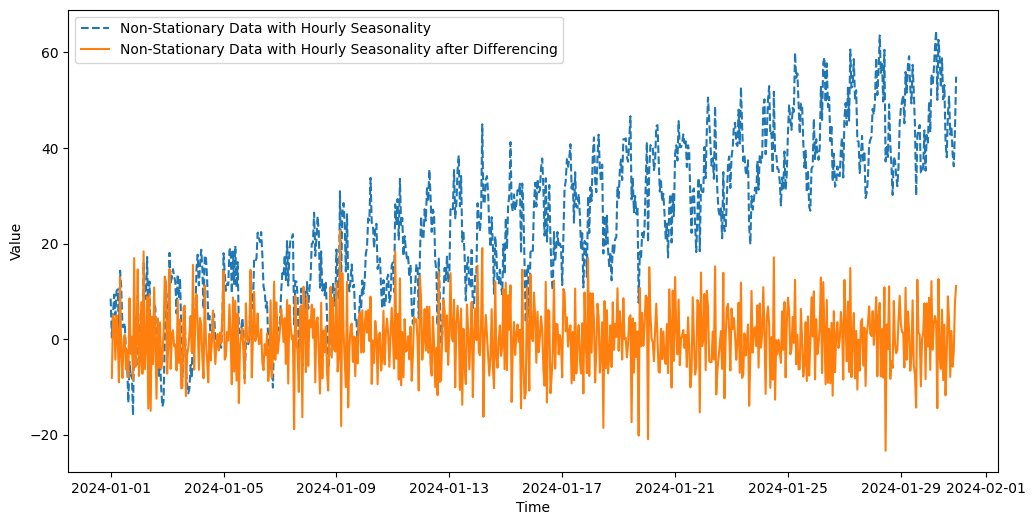

The time series is ADF Stationary
The time series is KPSS Stationary


<ipython-input-5-d1be8456e970>:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(data_diff)


Text(0.5, 1.0, 'Time-Varying AR(3) Coefficients')

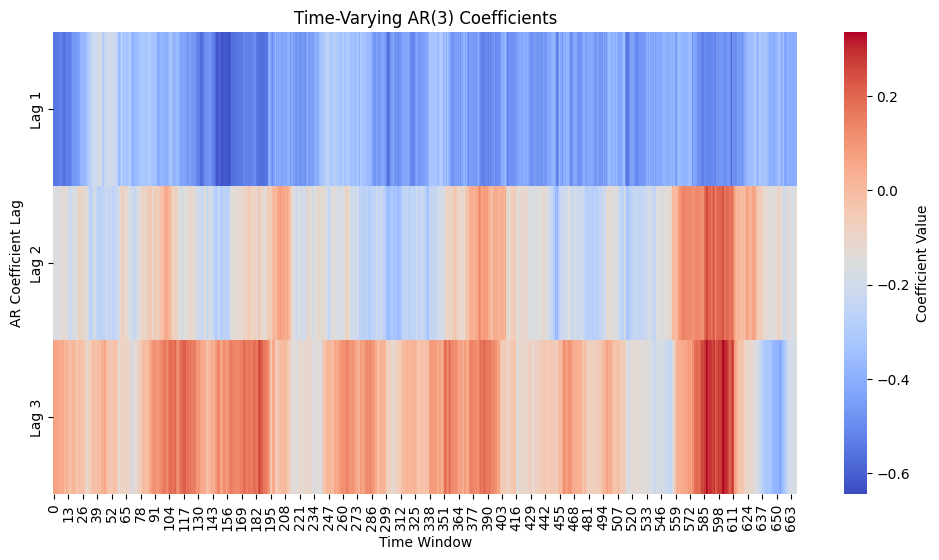

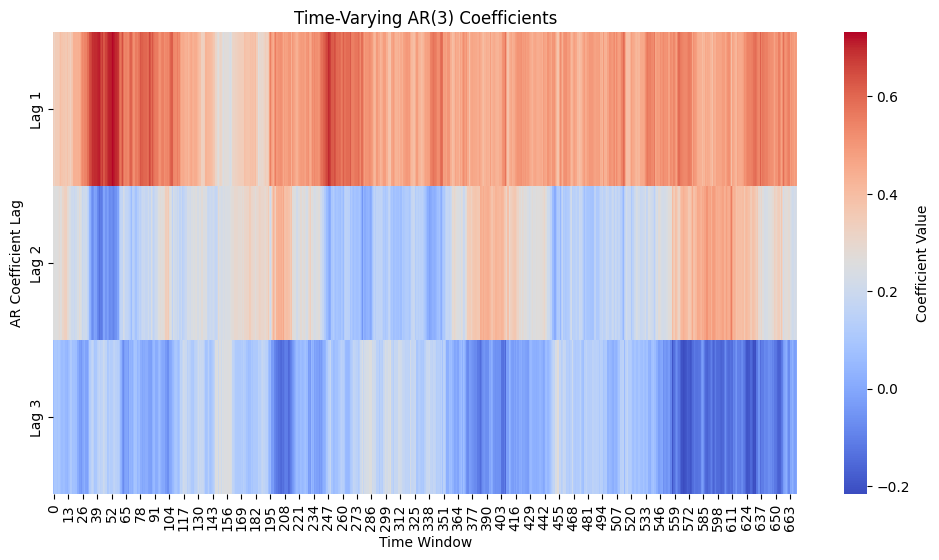

In [5]:
# Calling all libraries

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# Set the random seed for reproducibility
np.random.seed(7)

# Generate time index for hourly data over 30 days
n_days = 30
hours_per_day = 24
n = n_days * hours_per_day
time_index = pd.date_range(start='2024-01-01', periods=n, freq='h')

# Create a trend
trend = np.linspace(0, 50, n)  # Linear trend

# Create hourly seasonality (e.g., higher values during the day, lower at night)
seasonality = 10 * np.sin(2 * np.pi * (time_index.hour / 24))

# Add noise
noise = np.random.normal(scale=5, size=n)

# Combine trend, seasonality, and noise to create non-stationary data
y = trend + seasonality + noise

# Create a DataFrame to hold the data
data = pd.DataFrame({'DateTime': time_index, 'Value': y})

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Value'], label='Non-Stationary Data with Hourly Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Non-Stationary Data with Hourly Seasonality')
plt.legend()
plt.show()

data

# ADF Test

adf_res = adfuller(y)
if adf_res[1] > 0.05:
    print('The time series is not ADF Stationary')
else:
    print('The time series is ADF Stationary')

# KPSS Test

kpss_res = kpss(y)
if kpss_res[1] < 0.05:
    print('The time series is not KPSS Stationary')
else:
    print('The time series is KPSS Stationary')

# Differencing to get stationary time series
data_diff = np.diff(data['Value'])

# Plot the data, and compare it to the Differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Value'], label='Non-Stationary Data with Hourly Seasonality', linestyle='--')
plt.plot(data['DateTime'][1:], data_diff, label='Non-Stationary Data with Hourly Seasonality after Differencing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# ADF Test

adf_res = adfuller(data_diff)
if adf_res[1] > 0.05:
    print('The time series is not ADF Stationary')
else:
    print('The time series is ADF Stationary')

# KPSS Test

kpss_res = kpss(data_diff)
if kpss_res[1] < 0.05:
    print('The time series is not KPSS Stationary')
else:
    print('The time series is KPSS Stationary')

stationary_data = pd.DataFrame({'DateTime': time_index[1:], 'Value': data_diff})

stationary_data

# Function to fit a TVAR(3) model using rolling windows
def tvar(y, order, window_size):
    tvar_coefs = []
    for i in range(len(y) - window_size):
        window_data = y[i:i + window_size]
        model = AutoReg(window_data, lags=order, old_names=False)
        model_fit = model.fit()
        tvar_coefs.append(model_fit.params[1:])
    return np.array(tvar_coefs)

# Using Stationary Data

y = data_diff

# Fit TVAR(3) model
order = 3
window_size = 50
tvar_coefs = tvar(y, order, window_size)
tvar_coefs_data = pd.DataFrame(tvar_coefs, columns=[f'Lag {i+1}' for i in range(order)])

# Plot the time-varying coefficients on a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tvar_coefs_data.T, cmap='coolwarm', cbar_kws={'label': 'Coefficient Value'})
plt.xlabel('Time Window')
plt.ylabel('AR Coefficient Lag')
plt.title('Time-Varying AR(3) Coefficients')

# Using Non-Stationary Data

y = data['Value']

# Fit TVAR(3) model
order = 3
window_size = 50
tvar_coefs = tvar(y, order, window_size)
tvar_coefs_data = pd.DataFrame(tvar_coefs, columns=[f'Lag {i+1}' for i in range(order)])

# Plot the time-varying coefficients on a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tvar_coefs_data.T, cmap='coolwarm', cbar_kws={'label': 'Coefficient Value'})
plt.xlabel('Time Window')
plt.ylabel('AR Coefficient Lag')
plt.title('Time-Varying AR(3) Coefficients')
